In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [ ]:
# Cargamos los datos
file_path = '/content/Transporte_Publico_Espana.csv'
data = pd.read_csv(file_path)

# Vemos las priemras filas para entender su estructura
data.head()

ID_Viaje                Fecha                Ruta  Numero_Pasajeros  \
0         1  2023-01-01 00:00:00  Barcelona - Bilbao               NaN   
1         2  2023-01-01 00:01:00    Malaga - Sevilla              99.0   
2         3  2023-01-01 00:02:00   Madrid - Zaragoza              10.0   
3         4  2023-01-01 00:03:00    Sevilla - Madrid              96.0   
4         5  2023-01-01 00:04:00     Madrid - Malaga              22.0   

  Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte     Region  \
0          not_available              999         Tranvía    Sevilla   
1                  192.0               58            Tren  Barcelona   
2                   94.0              119         Autobús     Madrid   
3                  650.0                2           Metro     Malaga   
4                  335.0               51         Autobús    Sevilla   

  Dia_Semana  
0     Sunday  
1     Sunday  
2     Sunday  
3     Sunday  
4     Sunday

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


# Paso 1: Revisión de duplicados

In [ ]:
# Verificando duplicados
duplicados = data.duplicated().sum()
duplicados

100

In [ ]:
# Eliminando los duplicados
data_sin_duplicados = data.drop_duplicates()

In [ ]:
# Verificando cuántos duplicados quedan después de la eliminación
duplicados_finales = data_sin_duplicados.duplicated().sum()
print(f"Duplicados finales: {duplicados_finales}")

Duplicados finales: 0


In [ ]:
data_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100000 non-null  int64  
 1   Fecha                   100000 non-null  object 
 2   Ruta                    100000 non-null  object 
 3   Numero_Pasajeros        99000 non-null   float64
 4   Duracion_Viaje_Minutos  99667 non-null   object 
 5   Retraso_Minutos         100000 non-null  int64  
 6   Tipo_Transporte         100000 non-null  object 
 7   Region                  100000 non-null  object 
 8   Dia_Semana              100000 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


# Paso 2: Revisión de tipos de datos y datos faltantes

In [ ]:
# tipos de datos
tipos_de_datos = data.dtypes
tipos_de_datos

ID_Viaje                    int64
Fecha                      object
Ruta                       object
Numero_Pasajeros          float64
Duracion_Viaje_Minutos     object
Retraso_Minutos             int64
Tipo_Transporte            object
Region                     object
Dia_Semana                 object
dtype: object

In [ ]:
# Verificando valores faltantes
valores_faltantes = data.isnull().sum()
valores_faltantes

ID_Viaje                     0
Fecha                        0
Ruta                         0
Numero_Pasajeros          1001
Duracion_Viaje_Minutos     333
Retraso_Minutos              0
Tipo_Transporte              0
Region                       0
Dia_Semana                   0
dtype: int64

In [ ]:
# Asegurando que la columna Duracion_Viaje_Minutos sea de tipo float
data_sin_duplicados.loc[:,'Duracion_Viaje_Minutos'] = pd.to_numeric(data_sin_duplicados['Duracion_Viaje_Minutos'], errors='coerce')

In [ ]:
# Calculando la mediana de las columnas con valores faltantes
mediana_numero_pasajeros = data_sin_duplicados['Numero_Pasajeros'].median()
mediana_duracion_viaje_minutos = data_sin_duplicados['Duracion_Viaje_Minutos'].median()

In [ ]:
# Rellenando los valores faltantes con la mediana
data_sin_duplicados.loc[:,'Numero_Pasajeros'] = data_sin_duplicados['Numero_Pasajeros'].fillna(mediana_numero_pasajeros)
data_sin_duplicados.loc[:,'Duracion_Viaje_Minutos'] = data_sin_duplicados['Duracion_Viaje_Minutos'].fillna(mediana_duracion_viaje_minutos)

In [ ]:
# Convertir la columna Numero_Pasajeros a tipo int
data_sin_duplicados.loc[:,'Numero_Pasajeros'] = data_sin_duplicados['Numero_Pasajeros'].astype(int)

In [ ]:
# Verificar que no haya valores faltantes
valores_faltantes_despues = data_sin_duplicados.isnull().sum()
print(valores_faltantes_despues)

ID_Viaje                  0
Fecha                     0
Ruta                      0
Numero_Pasajeros          0
Duracion_Viaje_Minutos    0
Retraso_Minutos           0
Tipo_Transporte           0
Region                    0
Dia_Semana                0
dtype: int64


In [ ]:
# Convertiendo fecha a datetime
data_sin_duplicados.loc[:,'Fecha'] = pd.to_datetime(data_sin_duplicados['Fecha'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
data_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID_Viaje                100000 non-null  int64         
 1   Fecha                   100000 non-null  datetime64[ns]
 2   Ruta                    100000 non-null  object        
 3   Numero_Pasajeros        100000 non-null  int64         
 4   Duracion_Viaje_Minutos  100000 non-null  float64       
 5   Retraso_Minutos         100000 non-null  int64         
 6   Tipo_Transporte         100000 non-null  object        
 7   Region                  100000 non-null  object        
 8   Dia_Semana              100000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 7.6+ MB


In [ ]:
# Ajustar las opciones de pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar todas las filas de la columna 'Duracion_Viaje_Minutos'
print(data['Duracion_Viaje_Minutos'])

0         not_available
1                 192.0
2                  94.0
3                 650.0
4                 335.0
5                 584.0
6                 608.0
7                 425.0
8                  61.0
9                 693.0
10                345.0
11                668.0
12                104.0
13                719.0
14                 65.0
15                652.0
16                653.0
17                 90.0
18                356.0
19                 30.0
20                602.0
21                311.0
22                332.0
23                261.0
24                268.0
25                182.0
26                443.0
27                233.0
28                576.0
29                314.0
30                697.0
31                 85.0
32                411.0
33                362.0
34                680.0
35                264.0
36                122.0
37                 99.0
38                228.0
39                565.0
40                353.0
41              

# Coincidencia de Región

In [ ]:
# Definimos las ciudades/regiones
ciudades = ['Valencia', 'Barcelona', 'Bilbao', 'Madrid', 'Zaragoza', 'Malaga', 'Sevilla']

# Creamos la función para verificar la coincidencia
def region_coincide_con_ruta(row):
    ruta = row['Ruta']
    region = row['Region']
    for ciudad in ciudades:
        if ciudad in ruta and ciudad == region:
            return True
    return False

# Aplicamos la función para filtrar los datos
data_sin_duplicados.loc[:,'Coincide'] = data_sin_duplicados.apply(region_coincide_con_ruta, axis=1)
data_filtrada = data_sin_duplicados[data_sin_duplicados['Coincide']].drop(columns=['Coincide'])

In [ ]:
# Resetear el índice
data_filtrada.reset_index(drop=True, inplace=True)
data_filtrada.head()

ID_Viaje               Fecha                  Ruta  Numero_Pasajeros  \
0         3 2023-01-01 00:02:00     Madrid - Zaragoza                10   
1         7 2023-01-01 00:06:00       Madrid - Malaga                78   
2         9 2023-01-01 00:08:00    Madrid - Barcelona                60   
3        11 2023-01-01 00:10:00    Valencia - Sevilla                67   
4        19 2023-01-01 00:18:00  Zaragoza - Barcelona                27   

   Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte    Region  \
0                    94.0              119         Autobús    Madrid   
1                   608.0               21         Autobús    Malaga   
2                    61.0               76         Tranvía    Madrid   
3                   345.0                2         Autobús   Sevilla   
4                   356.0               24         Autobús  Zaragoza   

  Dia_Semana  
0     Sunday  
1     Sunday  
2     Sunday  
3     Sunday  
4     Sunday

In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28634 entries, 0 to 28633
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Viaje                28634 non-null  int64         
 1   Fecha                   28634 non-null  datetime64[ns]
 2   Ruta                    28634 non-null  object        
 3   Numero_Pasajeros        28634 non-null  int64         
 4   Duracion_Viaje_Minutos  28634 non-null  float64       
 5   Retraso_Minutos         28634 non-null  int64         
 6   Tipo_Transporte         28634 non-null  object        
 7   Region                  28634 non-null  object        
 8   Dia_Semana              28634 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 2.0+ MB


# Paso 4: Filtramos Tipo de Transporte Inviables

In [ ]:
# Filtrando los tipos de transporte inviables ('Tranvía' y 'Metro')
transportes_inviables = ['Tranvía', 'Metro']
data_filtrada = data_filtrada[~data_filtrada['Tipo_Transporte'].isin(transportes_inviables)]

# Mostrando un resumen de los datos filtrados para verificar
resumen_transporte = data_filtrada['Tipo_Transporte'].value_counts()
print(resumen_transporte)

Tipo_Transporte
Autobús    7216
Tren       7018
Name: count, dtype: int64


In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14234 entries, 0 to 28631
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_Viaje                14234 non-null  int64         
 1   Fecha                   14234 non-null  datetime64[ns]
 2   Ruta                    14234 non-null  object        
 3   Numero_Pasajeros        14234 non-null  int64         
 4   Duracion_Viaje_Minutos  14234 non-null  float64       
 5   Retraso_Minutos         14234 non-null  int64         
 6   Tipo_Transporte         14234 non-null  object        
 7   Region                  14234 non-null  object        
 8   Dia_Semana              14234 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.1+ MB


In [ ]:
# Guardando el DataFrame en un archivo CSV
file_path = '/content/data_transporte_bd.csv'
data_filtrada.to_csv(file_path, index=False)

# Paso 5: Transformar Tipo_Transporte y Dia_Semana a Numérico

In [ ]:
# Transformar Tipo_Transporte a numérico
data_filtrada['Tipo_Transporte'] = data_filtrada['Tipo_Transporte'].map({'Tren': 1, 'Autobús': 2})

# Transformar Dia_Semana a numérico
data_filtrada['Dia_Semana'] = data_filtrada['Dia_Semana'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})

# EDA VARIABLES CATEGÓRICAS

In [ ]:
# EDA de Variables Categóricas
cat_columns = data_filtrada.select_dtypes(include=['object', 'category']).columns
cat_data = data_filtrada[cat_columns]

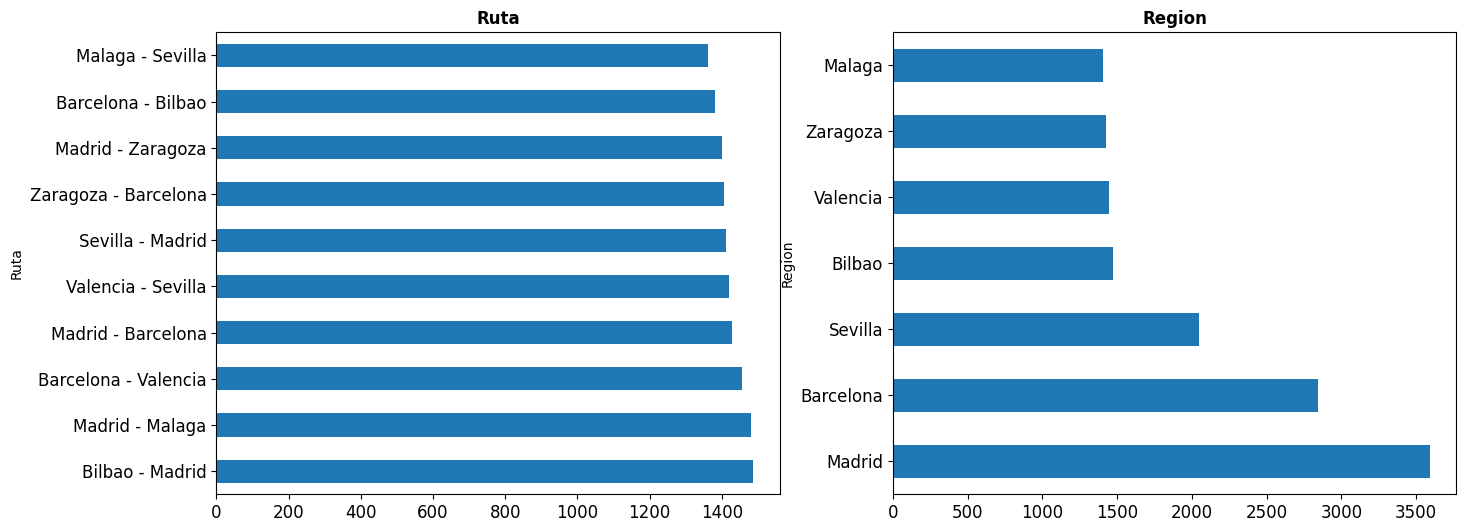

In [ ]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)  # ceil redondea hacia arriba y  y cat.shape[1] devuelve el
                                    # número de columnas en el DataFramme 'cat'.

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for index, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[index])
        ax[index].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[index].tick_params(labelsize = 12)

graficos_eda_categoricos(cat_data)

# EDA VARIABLES NUMÉRICAS

In [ ]:
# EDA de Variables Numéricas
num_data = data_filtrada.select_dtypes(include=[float, int])

In [ ]:
# Obtener estadísticas descriptivas
estadisticas_descriptivas = num_data.describe()

# Mostrar estadísticas descriptivas
estadisticas_descriptivas

ID_Viaje  Numero_Pasajeros  Duracion_Viaje_Minutos  \
count  14234.000000      14234.000000            14234.000000   
mean   49746.898131         54.309822              368.120627   
std    28892.616561         25.787905              203.134597   
min        3.000000         10.000000               15.000000   
25%    24680.000000         32.000000              191.000000   
50%    49665.000000         54.000000              367.000000   
75%    74786.250000         76.000000              544.000000   
max    99998.000000         99.000000              719.000000   

       Retraso_Minutos  Tipo_Transporte    Dia_Semana  
count     14234.000000     14234.000000  14234.000000  
mean         63.962554         1.506955      2.987424  
std          71.884694         0.499969      1.995476  
min           0.000000         1.000000      0.000000  
25%          29.000000         1.000000      1.000000  
50%          60.000000         2.000000      3.000000  
75%          91.000000         2.000000      5.000000  
max         999.000000         2.000000      6.000000

# Histograma de una variable numérica

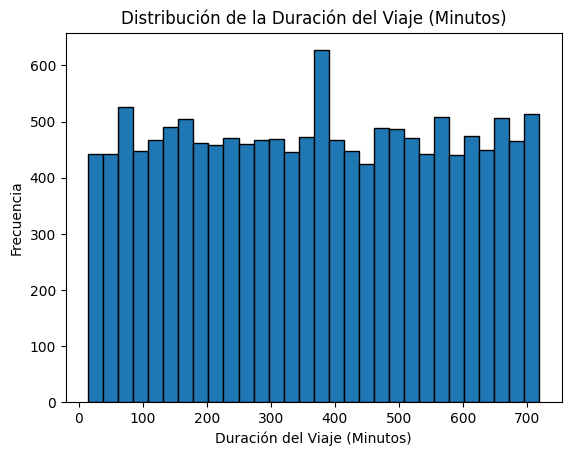

In [ ]:
import matplotlib.pyplot as plt

# Histograma de la duración del viaje
plt.hist(num_data['Duracion_Viaje_Minutos'], bins=30, edgecolor='k')
plt.title('Distribución de la Duración del Viaje (Minutos)')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Frecuencia')
plt.show()

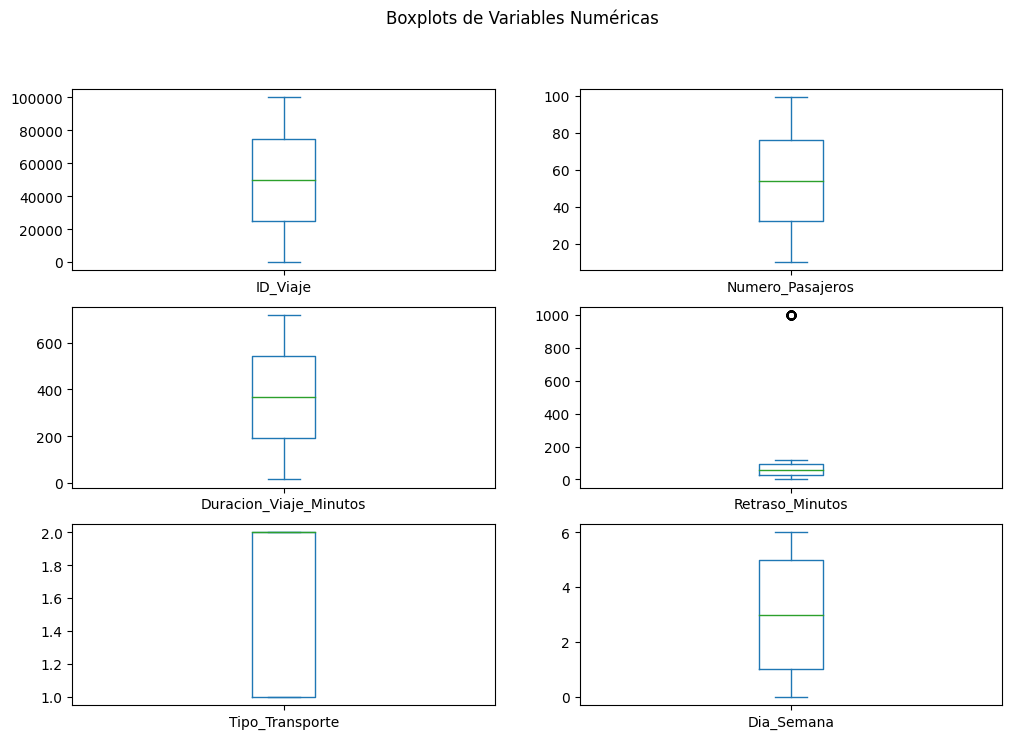

In [ ]:
# Boxplot de las variables numéricas
num_data.plot(kind='box', subplots=True, layout=(3, 2), figsize=(12, 8), title='Boxplots de Variables Numéricas')
plt.show()

In [ ]:
# Filtrar las filas donde Retraso_Minutos es 999
outliers = data_filtrada[data_filtrada['Retraso_Minutos'] == 999]

# Mostrar una muestra de los outliers
print(outliers.head())

      ID_Viaje               Fecha                  Ruta  Numero_Pasajeros  \
218        801 2023-01-01 13:20:00       Bilbao - Madrid                54   
646       2401 2023-01-02 16:00:00  Zaragoza - Barcelona                54   
763       2801 2023-01-02 22:40:00    Madrid - Barcelona                54   
1133      4001 2023-01-03 18:40:00     Madrid - Zaragoza                54   
1193      4201 2023-01-03 22:00:00      Sevilla - Madrid                54   

      Duracion_Viaje_Minutos  Retraso_Minutos  Tipo_Transporte     Region  \
218                    209.0              999                2     Madrid   
646                    367.0              999                1   Zaragoza   
763                    160.0              999                2  Barcelona   
1133                    82.0              999                2   Zaragoza   
1193                   367.0              999                2     Madrid   

      Dia_Semana  
218            6  
646            0  
763        

In [ ]:
# Contamos el número de outliers por Tipo_Transporte
outliers_por_tipo = outliers.groupby('Tipo_Transporte').size()

# Mostrar el conteo de outliers por Tipo_Transporte
print(outliers_por_tipo)

Tipo_Transporte
1    29
2    35
dtype: int64


In [ ]:
# Agrupamos por Tipo_Transporte y Ruta para ver las rutas correspondientes
outliers_rutas = outliers.groupby(['Tipo_Transporte', 'Ruta']).size().reset_index(name='count')

# Mostrar las rutas correspondientes con el número de outliers
print(outliers_rutas)

    Tipo_Transporte                  Ruta  count
0                 1    Barcelona - Bilbao      3
1                 1  Barcelona - Valencia      1
2                 1       Bilbao - Madrid      7
3                 1    Madrid - Barcelona      3
4                 1       Madrid - Malaga      3
5                 1     Madrid - Zaragoza      2
6                 1      Malaga - Sevilla      2
7                 1      Sevilla - Madrid      2
8                 1    Valencia - Sevilla      3
9                 1  Zaragoza - Barcelona      3
10                2    Barcelona - Bilbao      3
11                2  Barcelona - Valencia      5
12                2       Bilbao - Madrid      6
13                2    Madrid - Barcelona      2
14                2       Madrid - Malaga      2
15                2     Madrid - Zaragoza      3
16                2      Malaga - Sevilla      3
17                2      Sevilla - Madrid      3
18                2    Valencia - Sevilla      5
19                2 

In [ ]:
# Filtrar los datos anómalos en Duracion_Viaje_Minutos y Retraso_Minutos
data_filtrada = data_filtrada[(data_filtrada['Duracion_Viaje_Minutos'] > 120) & (data_filtrada['Retraso_Minutos'] < 999)]

print("Datos después del filtrado:")
# Mostramos una muestra de los datos filtrados
print(data_filtrada.head())

Datos después del filtrado:
   ID_Viaje               Fecha                  Ruta  Numero_Pasajeros  \
1         7 2023-01-01 00:06:00       Madrid - Malaga                78   
3        11 2023-01-01 00:10:00    Valencia - Sevilla                67   
4        19 2023-01-01 00:18:00  Zaragoza - Barcelona                27   
8        34 2023-01-01 00:33:00      Malaga - Sevilla                90   
9        36 2023-01-01 00:35:00       Bilbao - Madrid                34   

   Duracion_Viaje_Minutos  Retraso_Minutos  Tipo_Transporte    Region  \
1                   608.0               21                2    Malaga   
3                   345.0                2                2   Sevilla   
4                   356.0               24                2  Zaragoza   
8                   362.0               37                2   Sevilla   
9                   264.0               24                2    Madrid   

   Dia_Semana  
1           6  
3           6  
4           6  
8           6  
9 

In [ ]:
# Resetear el índice
data_filtrada.reset_index(drop=True, inplace=True)

In [ ]:
data_filtrada.head()

ID_Viaje               Fecha                  Ruta  Numero_Pasajeros  \
0         7 2023-01-01 00:06:00       Madrid - Malaga                78   
1        11 2023-01-01 00:10:00    Valencia - Sevilla                67   
2        19 2023-01-01 00:18:00  Zaragoza - Barcelona                27   
3        34 2023-01-01 00:33:00      Malaga - Sevilla                90   
4        36 2023-01-01 00:35:00       Bilbao - Madrid                34   

   Duracion_Viaje_Minutos  Retraso_Minutos  Tipo_Transporte    Region  \
0                   608.0               21                2    Malaga   
1                   345.0                2                2   Sevilla   
2                   356.0               24                2  Zaragoza   
3                   362.0               37                2   Sevilla   
4                   264.0               24                2    Madrid   

   Dia_Semana  
0           6  
1           6  
2           6  
3           6  
4           6

In [ ]:
# Seleccionando solo las columnas numéricas
num_data_filtrada = data_filtrada.select_dtypes(include=[float, int])

In [ ]:
# Obtener estadísticas descriptivas
estadisticas_descriptivas = num_data_filtrada.describe()

In [ ]:
estadisticas_descriptivas

ID_Viaje  Numero_Pasajeros  Duracion_Viaje_Minutos  \
count  12086.000000      12086.000000            12086.000000   
mean   49724.334354         54.315985              420.038143   
std    28892.783903         25.772501              173.531341   
min        7.000000         10.000000              121.000000   
25%    24675.250000         32.000000              271.000000   
50%    49579.500000         54.000000              416.000000   
75%    74734.250000         76.000000              571.000000   
max    99998.000000         99.000000              719.000000   

       Retraso_Minutos  Tipo_Transporte    Dia_Semana  
count     12086.000000     12086.000000  12086.000000  
mean         59.777759         1.508522      2.979398  
std          35.002686         0.499948      1.997845  
min           0.000000         1.000000      0.000000  
25%          29.000000         1.000000      1.000000  
50%          60.000000         2.000000      3.000000  
75%          90.000000         2.000000      5.000000  
max         119.000000         2.000000      6.000000

# Análisis para mejorar la Eficiencia del Transporte.

# Análisis de Correlación

In [ ]:
# Calcular la matriz de correlación para el DataFrame validado y limpiado
corr_data = num_data_filtrada.select_dtypes('number').corr()

# Mostrar la matriz de correlación
print("Matriz de correlación del DataFrame validado y limpiado:")
print(corr_data)

Matriz de correlación del DataFrame validado y limpiado:
                        ID_Viaje  Numero_Pasajeros  Duracion_Viaje_Minutos  \
ID_Viaje                1.000000         -0.007964                0.009254   
Numero_Pasajeros       -0.007964          1.000000               -0.016676   
Duracion_Viaje_Minutos  0.009254         -0.016676                1.000000   
Retraso_Minutos         0.003852         -0.002622                0.008354   
Tipo_Transporte        -0.005502          0.005857                0.004119   
Dia_Semana              0.008525          0.004261               -0.002426   

                        Retraso_Minutos  Tipo_Transporte  Dia_Semana  
ID_Viaje                       0.003852        -0.005502    0.008525  
Numero_Pasajeros              -0.002622         0.005857    0.004261  
Duracion_Viaje_Minutos         0.008354         0.004119   -0.002426  
Retraso_Minutos                1.000000         0.010549    0.008873  
Tipo_Transporte                0.010549  

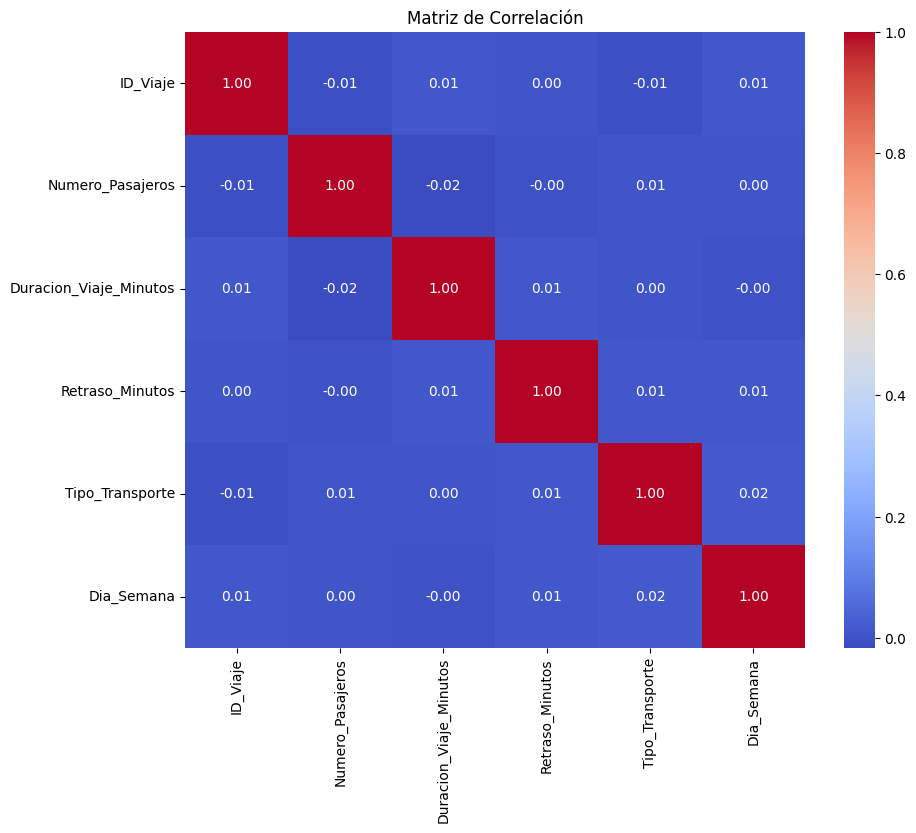

In [ ]:
# Visualizando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Regresión

In [ ]:
import statsmodels.api as sm

# Definimos las variables dependiente e independientes
y = num_data_filtrada['Duracion_Viaje_Minutos']
X = num_data_filtrada[['Numero_Pasajeros', 'Retraso_Minutos', 'Tipo_Transporte', 'Dia_Semana']]
X = sm.add_constant(X)  # Añadir constante

# Ajustamos el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostramos el resumen del modelo
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.119
Date:                    Sun, 28 Jul 2024   Prob (F-statistic):              0.345
Time:                            16:39:33   Log-Likelihood:                -79466.
No. Observations:                   12086   AIC:                         1.589e+05
Df Residuals:                       12081   BIC:                         1.590e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [ ]:
# Mostrar el resumen del modelo
summary_first = model.summary()
print(summary_first)

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.119
Date:                    Sun, 28 Jul 2024   Prob (F-statistic):              0.345
Time:                            16:39:50   Log-Likelihood:                -79466.
No. Observations:                   12086   AIC:                         1.589e+05
Df Residuals:                       12081   BIC:                         1.590e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [ ]:
# Guardar el resumen del modelo en un archivo de texto
with open('/content/model_summary_first.txt', 'w') as f:
    f.write(summary_first.as_text())

# Uso de Extracción de Caracterísitcas Temporales para Nuevo Análisis

In [ ]:
# Extraer características temporales
data_filtrada['Mes'] = data_filtrada['Fecha'].dt.month
data_filtrada['Día'] = data_filtrada['Fecha'].dt.day
data_filtrada['Hora'] = data_filtrada['Fecha'].dt.hour
data_filtrada['Minuto'] =data_filtrada['Fecha'].dt.minute
data_filtrada.drop(columns=['Fecha','ID_Viaje'], inplace=True)

In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ruta                    12086 non-null  object 
 1   Numero_Pasajeros        12086 non-null  int64  
 2   Duracion_Viaje_Minutos  12086 non-null  float64
 3   Retraso_Minutos         12086 non-null  int64  
 4   Tipo_Transporte         12086 non-null  int64  
 5   Region                  12086 non-null  object 
 6   Dia_Semana              12086 non-null  int64  
 7   Mes                     12086 non-null  int32  
 8   Día                     12086 non-null  int32  
 9   Hora                    12086 non-null  int32  
 10  Minuto                  12086 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 849.9+ KB


In [ ]:
data_filtrada.head()

Ruta  Numero_Pasajeros  Duracion_Viaje_Minutos  \
0       Madrid - Malaga                78                   608.0   
1    Valencia - Sevilla                67                   345.0   
2  Zaragoza - Barcelona                27                   356.0   
3      Malaga - Sevilla                90                   362.0   
4       Bilbao - Madrid                34                   264.0   

   Retraso_Minutos  Tipo_Transporte    Region  Dia_Semana  Mes  Día  Hora  \
0               21                2    Malaga           6    1    1     0   
1                2                2   Sevilla           6    1    1     0   
2               24                2  Zaragoza           6    1    1     0   
3               37                2   Sevilla           6    1    1     0   
4               24                2    Madrid           6    1    1     0   

   Minuto  
0       6  
1      10  
2      18  
3      33  
4      35

In [ ]:
# Seleccionandi solo las columnas numéricas
data_numerica = data_filtrada.select_dtypes(include=['number'])

# Nuevo Análisis de Correlación

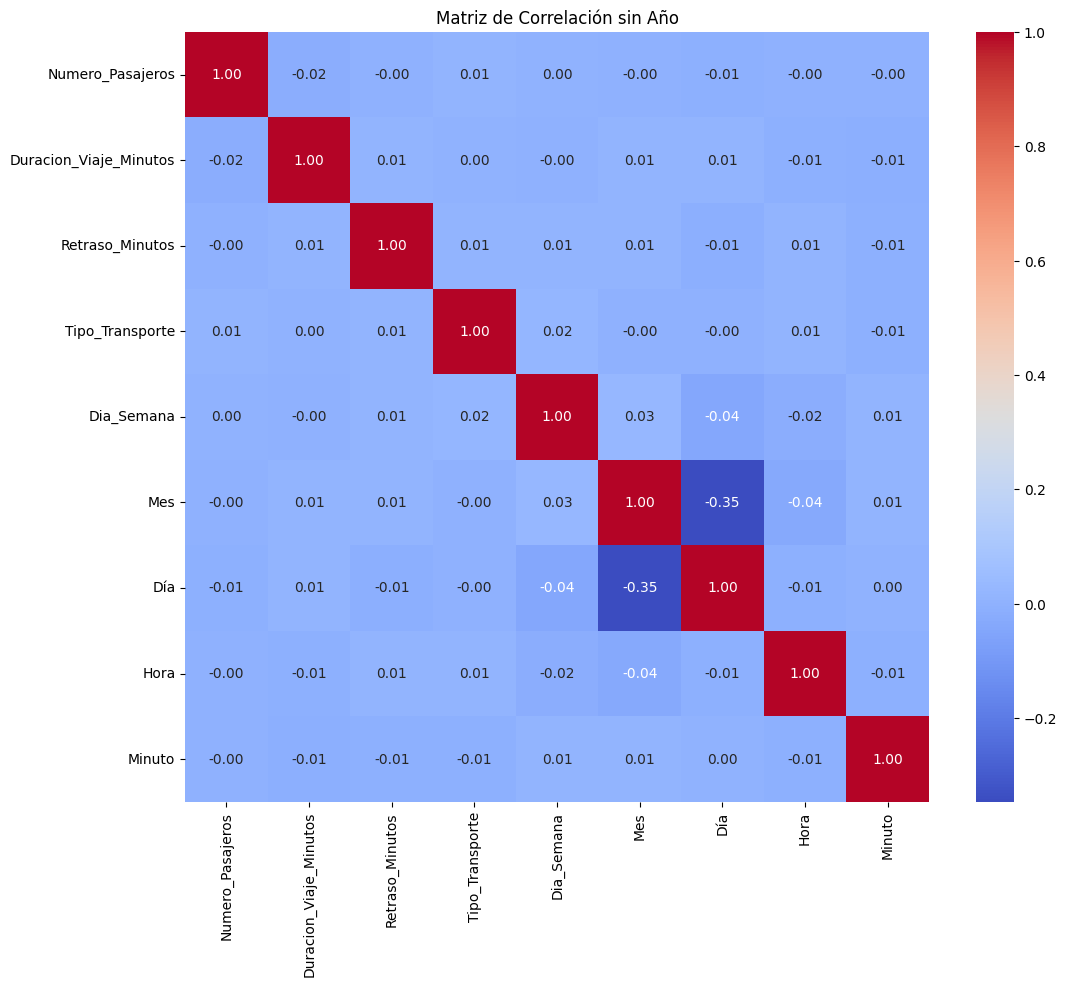

In [ ]:
# Calcular la matriz de correlación
correlacion = data_numerica.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación sin Año')
plt.show()

# Nuevo Análisis Regresión

In [ ]:
# Definimos las variables independiente (X) y dependiente (y)
# Eliminando variables no significativas basadas en los resultados anteriores
X = data_numerica[['Dia_Semana', 'Mes','Numero_Pasajeros']]
y = data_numerica['Duracion_Viaje_Minutos']

In [ ]:
# Agregando constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model_reduced = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model_reduced.summary())

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.296
Date:                    Sun, 28 Jul 2024   Prob (F-statistic):              0.274
Time:                            16:40:54   Log-Likelihood:                -79467.
No. Observations:                   12086   AIC:                         1.589e+05
Df Residuals:                       12082   BIC:                         1.590e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [ ]:
# Mostrando el resumen del modelo
summary = model_reduced.summary()
print(summary)

                              OLS Regression Results                              
Dep. Variable:     Duracion_Viaje_Minutos   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                  0.000
Method:                     Least Squares   F-statistic:                     1.296
Date:                    Sun, 28 Jul 2024   Prob (F-statistic):              0.274
Time:                            16:41:00   Log-Likelihood:                -79467.
No. Observations:                   12086   AIC:                         1.589e+05
Df Residuals:                       12082   BIC:                         1.590e+05
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [ ]:
# Guardando el resumen del modelo en un archivo de texto
with open('/content/model_summary.txt', 'w') as f:
    f.write(summary.as_text())

## Conclusiones y Recomendaciones
**Variables Independientes Poco Informativas:**

Ninguna de las variables independientes en los modelos actuales tiene un impacto significativo en la variable dependiente Duracion_Viaje_Minutos. Esto se refleja en los valores de p altos y el R-squared de 0.000.

**Simplicidad en la Selección de Variables:**

Dado que las variables temporales no aportan un valor explicativo significativo adicional, y que la matriz de correlación no muestra una fuerte relación entre Duracion_Viaje_Minutos y las otras variables, podrías simplificar el modelo utilizando solo las variables más relevantes como Numero_Pasajeros y Retraso_Minutos. Tampoco ha revelado cambios significativos.

**Pruebas Futuras:**

Para un análisis más profundo, considera explorar variables adicionales que puedan afectar la duración del viaje, como la distancia entre las ciudades, el tipo específico de transporte, la hora del día, condiciones meteorológicas, etc.

Se analizó el **VIF** (Variance Inflation Factor) para ver la cuantificación de multicolinealidad y dio valores muy bajos.

Se evaluaron los modelos utilizando métricas como R-squared, F-statistic y p-valores para los coeficientes.

# Análisis de Rutas
1. Agrupamos Datos
2. Calculamos Estadístias
3. Visualizamos los Resultados

In [ ]:
data_filtrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ruta                    12086 non-null  object 
 1   Numero_Pasajeros        12086 non-null  int64  
 2   Duracion_Viaje_Minutos  12086 non-null  float64
 3   Retraso_Minutos         12086 non-null  int64  
 4   Tipo_Transporte         12086 non-null  int64  
 5   Region                  12086 non-null  object 
 6   Dia_Semana              12086 non-null  int64  
 7   Mes                     12086 non-null  int32  
 8   Día                     12086 non-null  int32  
 9   Hora                    12086 non-null  int32  
 10  Minuto                  12086 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(2)
memory usage: 849.9+ KB


In [ ]:
# Agrupando los datos por ruta
data_por_ruta = data_filtrada.groupby('Ruta').agg({
    'Duracion_Viaje_Minutos': ['mean', 'median', 'std'],
    'Retraso_Minutos': ['mean', 'median', 'std'],
    'Mes': 'mean',
    'Dia_Semana': 'mean'
}).reset_index()

In [ ]:
# Renombrando columnas para mayor claridad
data_por_ruta.columns = ['Ruta', 'Duracion_Mean', 'Duracion_Median', 'Duracion_Std',
                         'Retraso_Mean', 'Retraso_Median', 'Retraso_Std',
                         'Mes_Mean', 'Dia_Semana_Mean']

In [ ]:
# Mostrarndo el resumen de los datos por ruta
print(data_por_ruta)

                   Ruta  Duracion_Mean  Duracion_Median  Duracion_Std  \
0    Barcelona - Bilbao     422.637619            428.0    177.591903   
1  Barcelona - Valencia     414.463217            412.0    171.865280   
2       Bilbao - Madrid     425.427553            428.0    176.296733   
3    Madrid - Barcelona     417.147446            409.0    173.687775   
4       Madrid - Malaga     417.181818            413.5    172.177815   
5     Madrid - Zaragoza     418.769038            416.0    171.727483   
6      Malaga - Sevilla     423.511688            424.0    174.450006   
7      Sevilla - Madrid     409.988314            401.0    170.999592   
8    Valencia - Sevilla     426.497095            426.0    173.249161   
9  Zaragoza - Barcelona     425.098818            420.5    173.182116   

   Retraso_Mean  Retraso_Median  Retraso_Std  Mes_Mean  Dia_Semana_Mean  
0     61.298533            62.0    34.677750  1.706644         2.871441  
1     61.123686            62.0    34.975004  1.

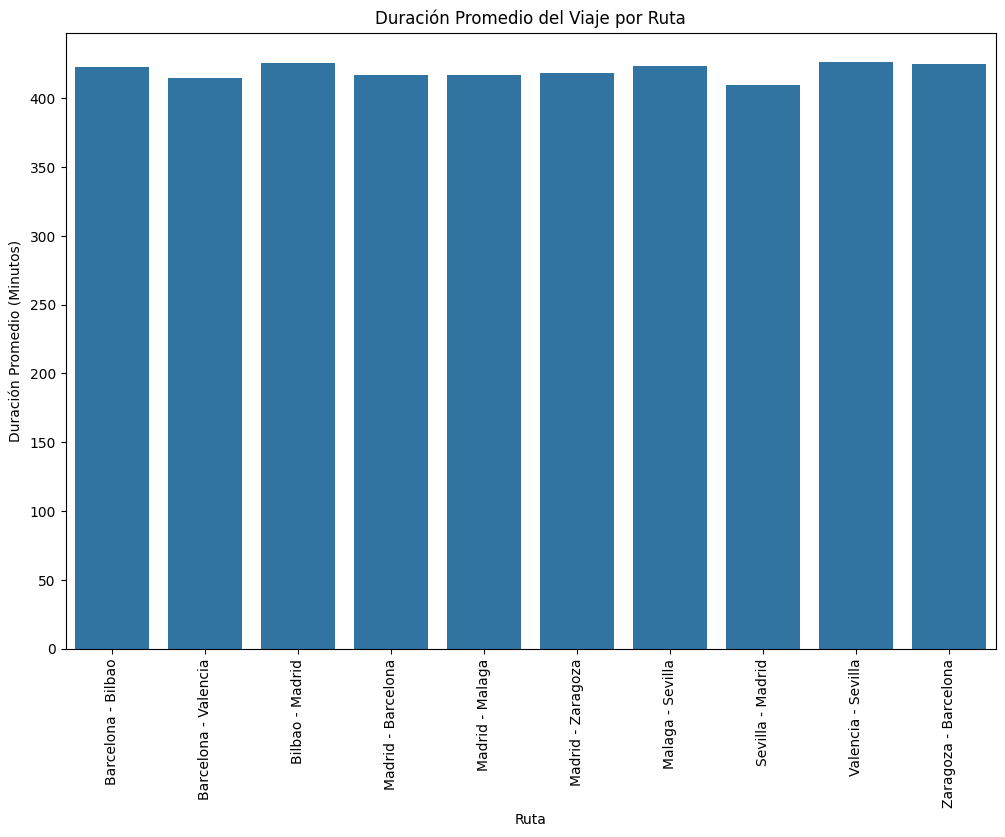

In [ ]:
# Gráfico de la duración del viaje por ruta
plt.figure(figsize=(12, 8))
sns.barplot(x='Ruta', y='Duracion_Mean', data=data_por_ruta)
plt.title('Duración Promedio del Viaje por Ruta')
plt.xticks(rotation=90)
plt.ylabel('Duración Promedio (Minutos)')
plt.xlabel('Ruta')
plt.show()

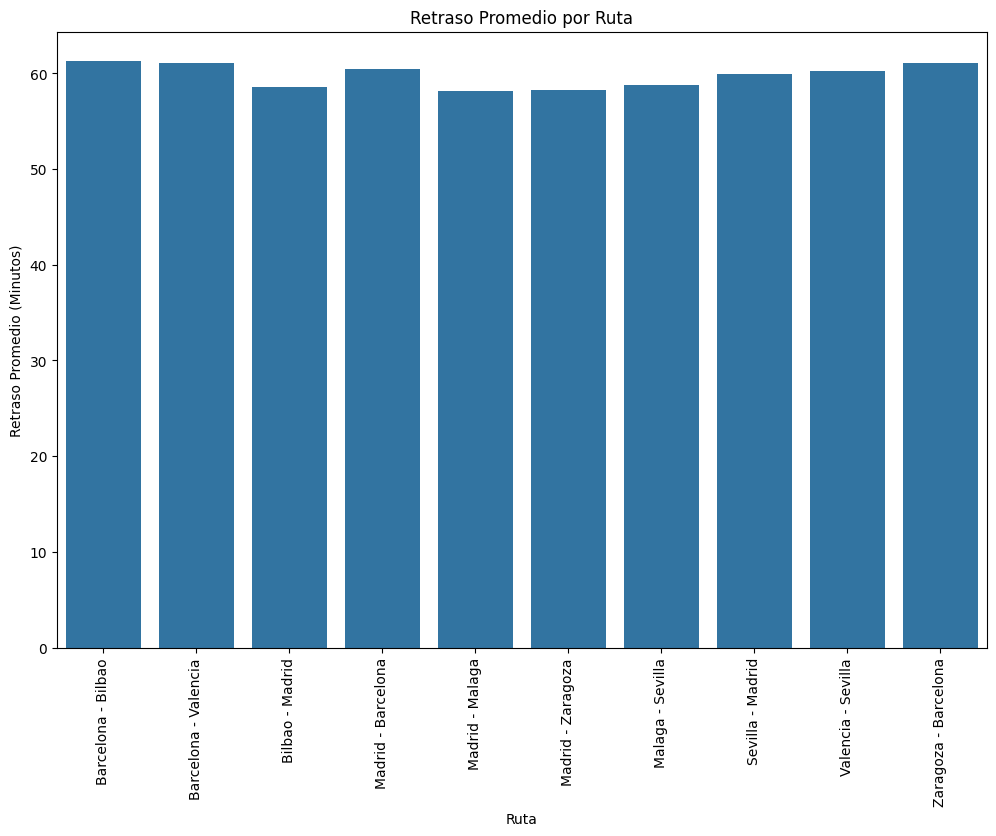

In [ ]:
# Gráfico del retraso por ruta
plt.figure(figsize=(12, 8))
sns.barplot(x='Ruta', y='Retraso_Mean', data=data_por_ruta)
plt.title('Retraso Promedio por Ruta')
plt.xticks(rotation=90)
plt.ylabel('Retraso Promedio (Minutos)')
plt.xlabel('Ruta')
plt.show()

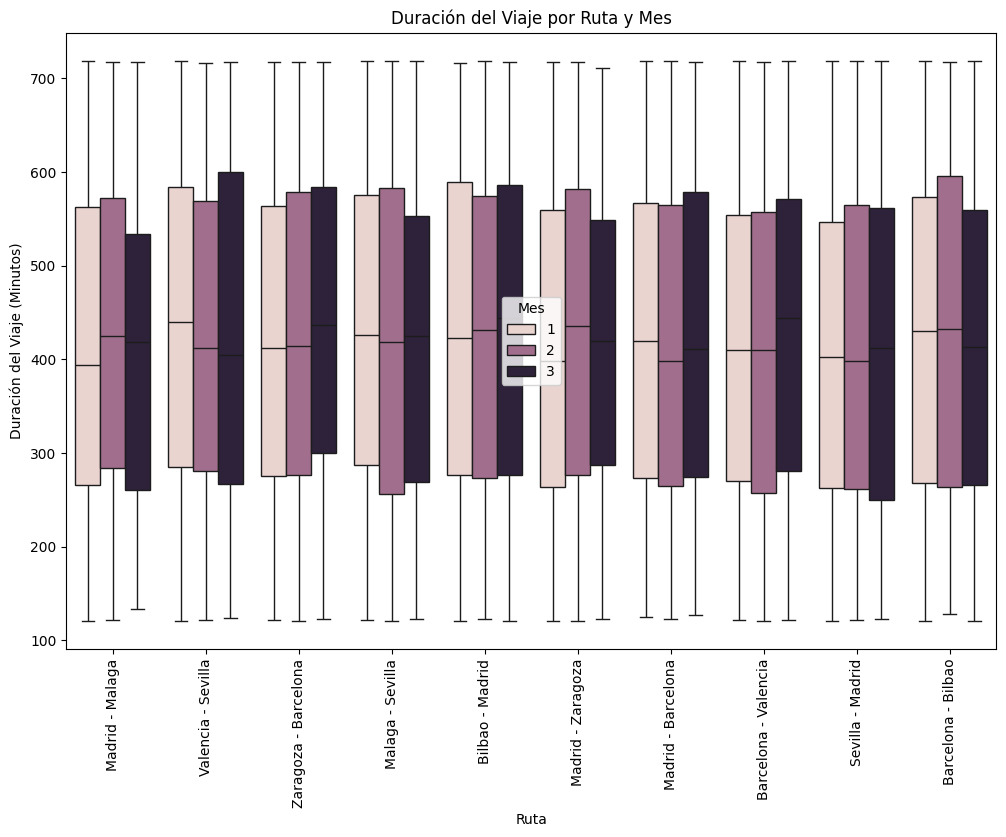

In [ ]:
# Gráfico duración del viaje por ruta considerando Mes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Duracion_Viaje_Minutos', hue='Mes', data=data_filtrada)
plt.title('Duración del Viaje por Ruta y Mes')
plt.xticks(rotation=90)
plt.ylabel('Duración del Viaje (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Mes')
plt.show()

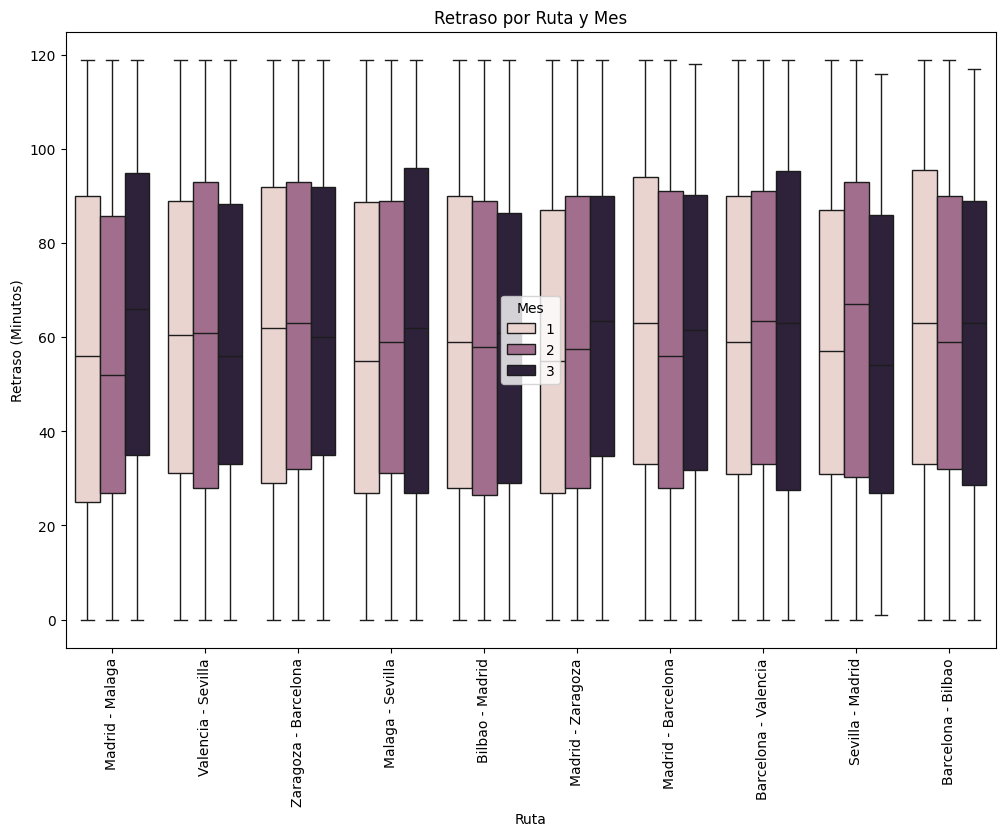

In [ ]:
# Gráfico Retraso por ruta considerando Mes
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Retraso_Minutos', hue='Mes', data=data_filtrada)
plt.title('Retraso por Ruta y Mes')
plt.xticks(rotation=90)
plt.ylabel('Retraso (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Mes')
plt.show()

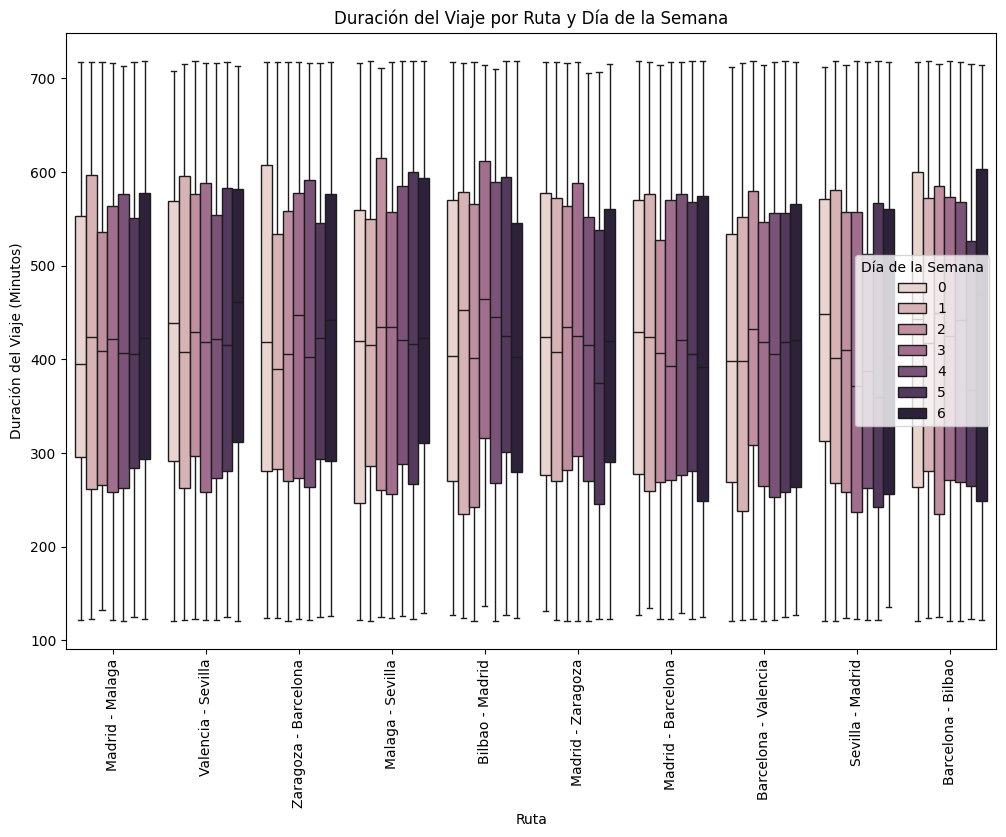

In [ ]:
# Gráfico duración del viaje por ruta considerando Dia_Semana
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Duracion_Viaje_Minutos', hue='Dia_Semana', data=data_filtrada)
plt.title('Duración del Viaje por Ruta y Día de la Semana')
plt.xticks(rotation=90)
plt.ylabel('Duración del Viaje (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Día de la Semana')
plt.show()

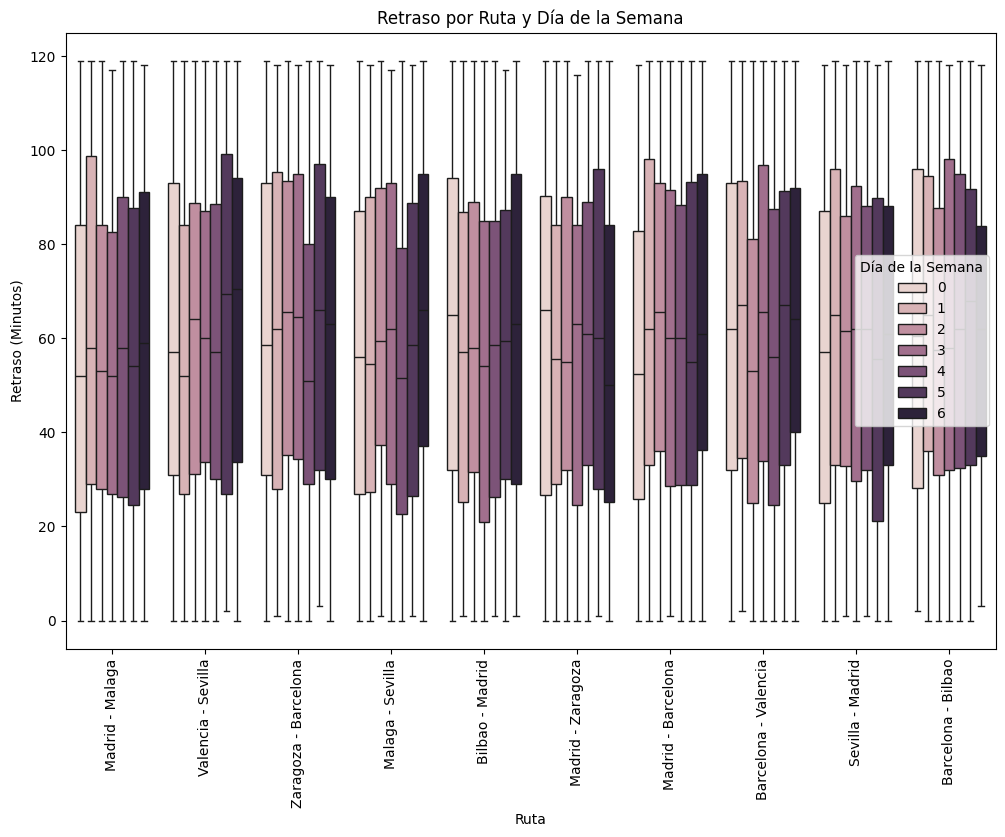

In [ ]:
# Gráfico Retraso por ruta considerando Dia_Semana
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ruta', y='Retraso_Minutos', hue='Dia_Semana', data=data_filtrada)
plt.title('Retraso por Ruta y Día de la Semana')
plt.xticks(rotation=90)
plt.ylabel('Retraso (Minutos)')
plt.xlabel('Ruta')
plt.legend(title='Día de la Semana')
plt.show()

In [ ]:
# Guardando el DataFrame en un archivo CSV
file_path = '/content/data_limpia.csv'
data_filtrada.to_csv(file_path, index=False)